# Final Project


## Miller, et al



### The purpose of this analysis is to see if we can accurately predict Total 

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Set seaborn themes for use with matplotlib functions
sns.set()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Initialize random state for generating random numbers in a consistent way
rand_state = 1000

# Read csv file into a pandas dataframe
df = pd.read_csv("supermarket_sales - Sheet1.csv")

# Print first 5 rows of data from dataframe
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Data preprocessing


In [266]:
# Replace '-' with 0 in the 'Invoice ID' column
df['Invoice ID'] = df['Invoice ID'].apply(lambda x: x.replace('-', '0'))

In [267]:
# Convert date strings to integers representing the number of seconds since the Unix epoch
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").timestamp())

In [268]:
# Convert time strings to strings in the form of 'abcd'
df['Time'] = df['Time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M").strftime("%H%M"))
# Convert the column to integer type
df['Time'] = pd.to_numeric(df['Time'])

In [269]:
df['Time'].describe()

count    1000.000000
mean     1521.098000
std       318.704265
min      1000.000000
25%      1243.000000
50%      1519.000000
75%      1815.000000
max      2059.000000
Name: Time, dtype: float64

In [270]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,75006708428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1.546672e+09,1308,Ewallet,522.83,4.761905,26.1415,9.1
1,22603103081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,1.552028e+09,1029,Cash,76.40,4.761905,3.8200,9.6
2,63104103108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,1.551596e+09,1323,Credit card,324.31,4.761905,16.2155,7.4
3,12301901176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1.548572e+09,2033,Ewallet,465.76,4.761905,23.2880,8.4
4,37307307910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,1.549609e+09,1037,Ewallet,604.17,4.761905,30.2085,5.3


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   float64
 11  Time                     1000 non-null   int64  
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

We need to change the type of categorical variables first,


In [272]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [273]:
numeric = ["Invoice ID", "Unit price", "Quantity",'Tax 5%','Total','Date','Time','cogs','gross margin percentage','gross income','Rating']

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical = ["Branch", "City", "Customer type", "Gender", 
"Product line", "Payment"]

for col in categorical: 
    df[col] = df[col].astype("category")

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Invoice ID               1000 non-null   int64   
 1   Branch                   1000 non-null   category
 2   City                     1000 non-null   category
 3   Customer type            1000 non-null   category
 4   Gender                   1000 non-null   category
 5   Product line             1000 non-null   category
 6   Unit price               1000 non-null   float64 
 7   Quantity                 1000 non-null   int64   
 8   Tax 5%                   1000 non-null   float64 
 9   Total                    1000 non-null   float64 
 10  Date                     1000 non-null   float64 
 11  Time                     1000 non-null   int64   
 12  Payment                  1000 non-null   category
 13  cogs                     1000 non-null   float64 
 14  gross mar

Next we need to drop the ID variable because it's irrelevant to our analysis.

In [275]:
df.drop('Invoice ID',axis=1, inplace=True)

Next we check if there are any NA's, as can be seen, there are not any.

In [276]:
df.isna().sum()  

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We checked the distribution of our target variable Price. As can be seen, there are a few outliers that need to be taken care of. Price is also very right skewed.

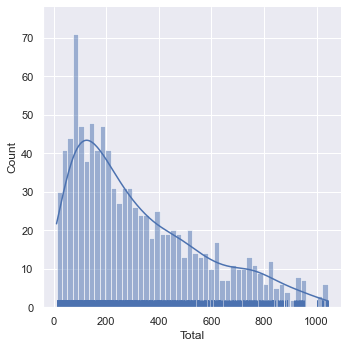

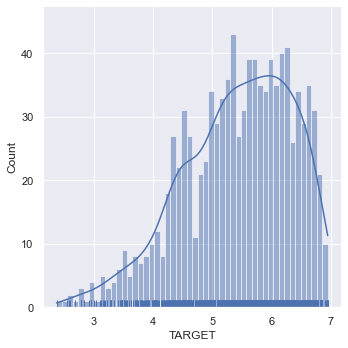

In [277]:
target = np.log(df['Total']) 
df['TARGET'] = target

# distribution plot of sale price
sns.displot(df['Total'], kde=True, bins=50, rug=True)
plt.show()

# distribution plot of the log of sale price
sns.displot(df['TARGET'], kde=True, bins=50, rug=True)
plt.show()

We dropped the outliers from Total and did a log transformation to make it more normal. We will use this trasformed variable for our entire anaylsis and drop price from the dataframe. We also dropped the variable Model from the dataframe because its a categorical variable but has a lot of unique observations, making it computationally difficult to use. This isn't a problem for machine learning, however, it is a problem for our laptops.

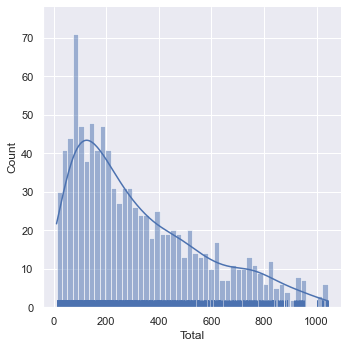

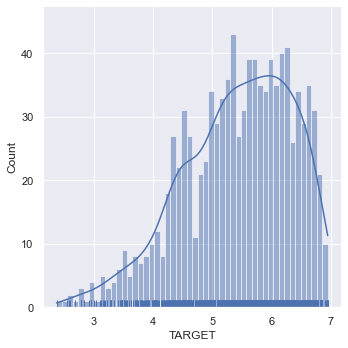

In [278]:
target = np.log(df['Total']) 
df['TARGET'] = target

# distribution plot of sale price
sns.displot(df['Total'], kde=True, bins=50, rug=True)
plt.show()

# distribution plot of the log of sale price
sns.displot(df['TARGET'], kde=True, bins=50, rug=True)
plt.show()

### EDA

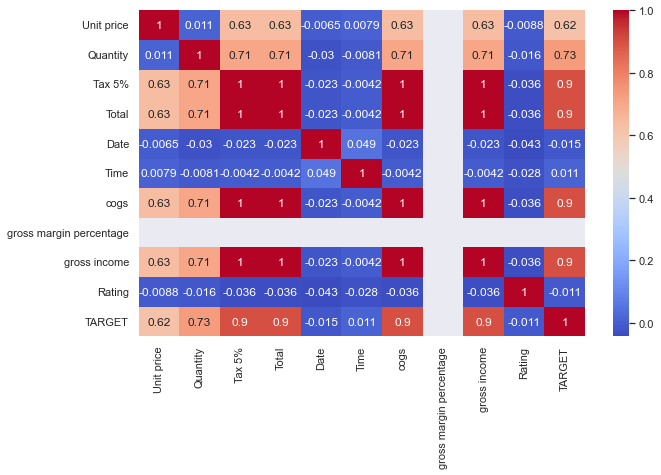

In [279]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

There is perfect colinearity. Variables  gross income, total, cogs ,and tax% need be droppped. 

In [280]:
df.drop(['Tax 5%','gross income','cogs','gross margin percentage'],axis=1, inplace=True)

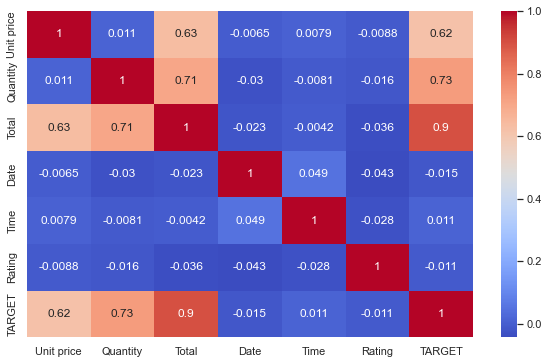

In [281]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

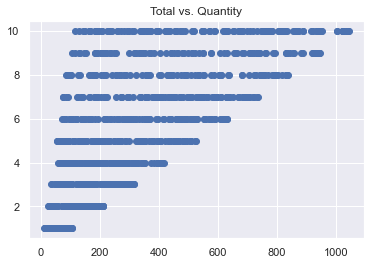

In [282]:
plt.scatter(x='Total', y = 'Quantity', data = df)
plt.title('Total vs. Quantity')
plt.show()

<AxesSubplot:>

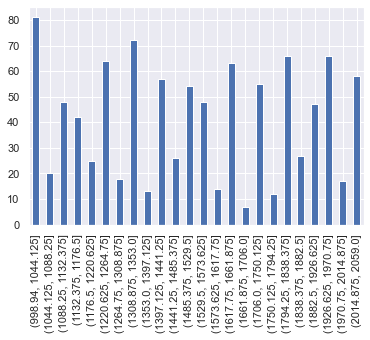

In [283]:
df['Time'].value_counts(bins=24,sort=False).head(24).plot.bar()

<AxesSubplot:>

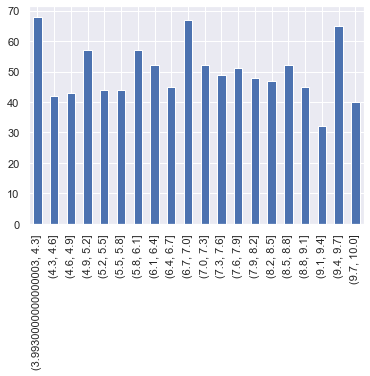

In [284]:
df['Rating'].value_counts(sort=False,bins=20).head(20).plot.bar()

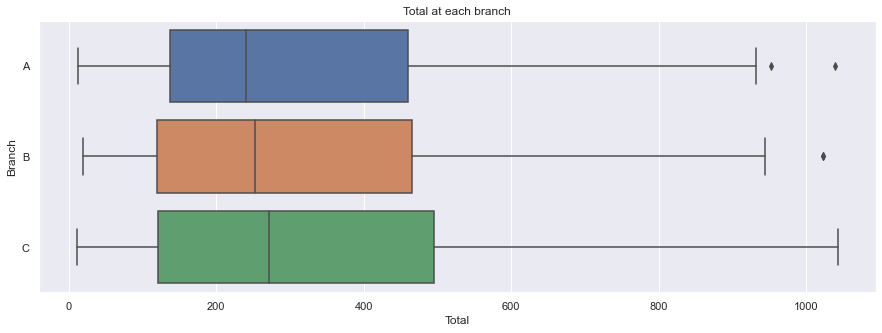

In [285]:
plt.figure(figsize = (15,5))

ax = sns.boxplot(x = 'Total', y = 'Branch', data = df)
ax.set_xlabel('Total')
ax.set_ylabel('Branch')
plt.title('Total at each branch')
plt.show()

The above 2 plots show the variable category. This cariable represents the type of car for each observation. As can be seen, most of the observations are sedans, jeeps, and hatchbacks. The boxplots show the same thing we see before, all are rightskewed. Most of the higher priced vars are Jeeps, coupes, and Sedans.

### Last Cleaning

The following lines make a new dataframe to use for our tree based methods, drop price, and makes the categorical variables dummies.

In [286]:
df_tree = df

In [287]:
df_tree.drop('Total',axis=1, inplace=True)
df_tree.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,TARGET
0,A,Yangon,Member,Female,Health and beauty,74.69,7,1.546672e+09,1308,Ewallet,9.1,6.308047
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,1.552028e+09,1029,Cash,9.6,4.384773
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,1.551596e+09,1323,Credit card,7.4,5.830490
3,A,Yangon,Member,Male,Health and beauty,58.22,8,1.548572e+09,2033,Ewallet,8.4,6.192461
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,1.549609e+09,1037,Ewallet,5.3,6.452646


In [288]:
df = pd.get_dummies(df)
df.head()

,Unit price,Quantity,Date,Time,Rating,TARGET,Branch_A,Branch_B,Branch_C,City_Mandalay,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,1.546672e+09,1308,9.1,6.308047,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,1.552028e+09,1029,9.6,4.384773,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,1.551596e+09,1323,7.4,5.830490,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,1.548572e+09,2033,8.4,6.192461,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,1.549609e+09,1037,5.3,6.452646,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


Scaling the Features

In [289]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_temp = df[["Time", "Date","Rating"]]
df_sc = df
df_sc_temp = scaler.fit_transform(df_temp)
df_sc_temp = pd.DataFrame(df_sc_temp, columns=df_temp.columns)

df_sc["Time"] = df_sc_temp["Time"]
df_sc["Date"] = df_sc_temp["Date"]
df_sc["Rating"] = df_sc_temp["Rating"]

df_sc.head()

,Unit price,Quantity,Date,Time,Rating,TARGET,Branch_A,Branch_B,Branch_C,City_Mandalay,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,-1.593595,-0.668973,1.238443,6.308047,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,0.876784,-1.544831,1.529527,4.384773,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,0.677559,-0.621884,0.248760,5.830490,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,-0.717009,1.607001,0.830927,6.192461,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,-0.238871,-1.519717,-0.973790,6.452646,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [290]:
df_sc.isna().sum() 
df_sc = df_sc.dropna()

### Linear Regression

In [291]:
y = df_sc['TARGET']
X = df_sc.drop('TARGET', axis=1) # be careful inplace= False

# This is what we used to split it.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.8

In [292]:
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)

reg_model = LinearRegression( )
reg_model.fit(X_train, y_train)

LinearRegression()

In [293]:
y_hat_test = reg_model.predict(X_test)

In [294]:
log_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,y_test,y_hat_test,resid
967,5.541975,5.361832,0.180143
713,4.874300,5.328479,-0.454179
222,4.127175,4.337441,-0.210266
321,3.723063,4.030614,-0.307551
898,6.444386,6.347258,0.097128


In [295]:
MSE_test = np.mean(np.square(log_predictions['resid']))
np.round(MSE_test,3)
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.293

5-fold Cross Validated RMSE for Linear Regression 

In [296]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

my_estimator = LinearRegression()


MSE_five = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")
RMSE_five = np.sqrt(MSE_five)
RMSE_CV5 = np.mean(RMSE_five)
np.round(RMSE_CV5,3)


0.273

R-Squared for Linear Regression: .359

In [297]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

X_train_wc = sm.add_constant(X_train)
X_test_wc = sm.add_constant(X_test)

sm.OLS(y_test, X_test).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           2.77e-92
Time:                        21:53:29   Log-Likelihood:                -22.224
No. Observations:                 200   AIC:                             78.45
Df Residuals:                     183   BIC:                             134.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Unit price                              0.0211      0.001     26.913      0.000       0.020       0.023
Quantity                                0.2387      0.007     34.150      0.000       0.225       0.252
Date                                   -0.0026      0.021     -0.121      0.904      -0.045       0.040
Time                                    0.0156      0.021      0.735      0.464      -0.026       0.058
Rating                                  0.0288      0.022      1.283      0.201      -0.015       0.073
Branch_A                                0.4680      0.017     26.747      0.000       0.433       0.503
Branch_B                                0.4633      0.017     27.083      0.000       0.430       0.497
Branch_C                                0.4236      0.017     24.663      0.000       0.390       0.457
City_Mandalay                           0.4633      0.017     27.083      0.000       0.430       0.497
City_Naypyitaw                          0.4236      0.017     24.663      0.000       0.390       0.457
City_Yangon                             0.4680      0.017     26.747      0.000       0.433       0.503
Customer type_Member                    0.7062      0.025     27.770      0.000       0.656       0.756
Customer type_Normal                    0.6487      0.025     26.280      0.000       0.600       0.697
Gender_Female                           0.6693      0.026     25.914      0.000       0.618       0.720
Gender_Male                             0.6856      0.024     28.070      0.000       0.637       0.734
Product line_Electronic accessories     0.2677      0.047      5.741      0.000       0.176       0.360
Product line_Fashion accessories        0.1070      0.042      2.550      0.012       0.024       0.190
Product line_Food and beverages         0.1904      0.048      3.950      0.000       0.095       0.286
Product line_Health and beauty          0.1810      0.048      3.747      0.000       0.086       0.276
Product line_Home and lifestyle         0.3515      0.048      7.339      0.000       0.257       0.446
Product line_Sports and travel          0.2573      0.049      5.286      0.000       0.161       0.353
Payment_Cash                            0.4660      0.030     15.620      0.000       0.407       0.525
Payment_Credit card                     0.4092      0.032     12.754      0.000       0.346       0.472
Payment_Ewallet                         0.4797      0.030     15.878      0.000       0.420       0.539
==============================================================================
Omnibus:                       14.417   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.387
Skew:                          -0.656 

Regularization


We need to find the optimal alphas for each method. The following code does that, and the lines after show the optimal alphas.

In [298]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

alpha_ridge = 10**np.linspace(-4,2,100)
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
alpha_ridge_opt = ridgecv.alpha_

# Optimal Lasso
alpha_lasso = 10**np.linspace(-4,2,100)
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
alpha_lasso_opt = lassocv.alpha_

# Optimal Elastic Net
alpha_elasticnet = 10**np.linspace(-4,2,100)
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
alpha_elasticnet_opt = elasticnetcv.alpha_

In [299]:
alpha_elasticnet_opt

0.04271450971416137

In [300]:
alpha_lasso_opt

0.022900684335368383

In [301]:
alpha_ridge_opt

100.0

In [302]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha = alpha_ridge_opt)
model_lasso = Lasso(alpha = alpha_lasso_opt)
model_net = ElasticNet(alpha = alpha_elasticnet_opt)

y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
967,5.541975,5.361832,5.376856,5.400056,5.401113
713,4.874300,5.328479,5.312656,5.323486,5.322102
222,4.127175,4.337441,4.352304,4.376912,4.377079
321,3.723063,4.030614,4.045938,4.062197,4.063964
898,6.444386,6.347258,6.351876,6.400972,6.400481


RIDGE RMSE:

In [303]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,5)

0.29284

LASSO RMSE:

In [304]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.291

ELASTIC NET RMSE:

In [305]:
MSE_test = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.291

In [306]:
model_net.score(X_test, y_test)

0.9097333660232595

In [307]:
model_lasso.score(X_test, y_test)

0.9098351269229572

In [308]:
model_ridge.score(X_test, y_test)

0.9087479013330727

All of these models had better RMSE's but worse R-squareds. They didn't take very long to run though which is nice.

KNN

In [309]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

KNN_regression = KNeighborsRegressor()
KNN_regression.fit(X_train, y_train)


KNeighborsRegressor()

R-Squared KNN not optimized

In [310]:
KNN_regression.score(X_test, y_test)

0.9351744395333844

Cross Validated KNN RMSE with no optimization

In [311]:

NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

0.2135

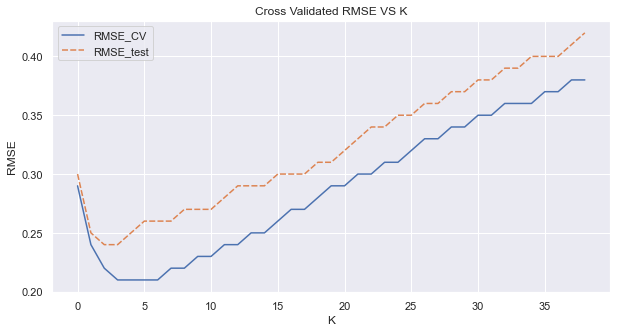

In [312]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

As can be seen, the optimal cross validated number of neighbors is 7.

Optimal K:

In [313]:
optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']

4

R-Squared for Optimum KNN

In [314]:
KNN_regression = KNeighborsRegressor(n_neighbors=7)
KNN_regression.fit(X_train, y_train)

KNN_regression.score(X_test, y_test)

0.9272170945105935

RMSE for optimal KNN

In [315]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

0.2124

KNN performs about the same as the linear regression model. It took longer to run too.

SVM


In [316]:
from sklearn.svm import SVR

SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)
y_hat = SVM_regression.predict(X_test)

5 fold CV RMSE for unoptimized SVM

In [317]:
NMSE = cross_val_score(estimator = SVR(), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.2809

R-Squared for unoptimized SVM

In [318]:
SVM_regression.score(X_test, y_test)

0.8895777867828402

In [319]:
from sklearn.model_selection import GridSearchCV

my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 , scoring=None)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

This took 2 hours, basically on the dot

Optimized SVM hyperparameters

In [320]:
grid.best_estimator_

SVR(C=10, gamma=0.01)

R-Squared for optimized SVM

In [321]:
grid.score(X_test, y_test)

0.9848999301237974

RMSE for optimized SVM

In [322]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma = 0.1), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.3103

This RMSE took 14 minutes

SVM performs better than the linear regression model. The r-squared jumped quite significantly.

### Decision Trees

In [325]:
from sklearn.preprocessing import StandardScaler
df_tree["Time"] = df_sc["Time"]
df_tree["Date"] = df_sc["Date"]
df_tree["Rating"] = df_sc["Rating"]

df_tree.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,TARGET
0,A,Yangon,Member,Female,Health and beauty,74.69,7,-1.593595,-0.668973,Ewallet,1.238443,6.308047
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,0.876784,-1.544831,Cash,1.529527,4.384773
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,0.677559,-0.621884,Credit card,0.248760,5.830490
3,A,Yangon,Member,Male,Health and beauty,58.22,8,-0.717009,1.607001,Ewallet,0.830927,6.192461
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,-0.238871,-1.519717,Ewallet,-0.973790,6.452646


In [334]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_categorical = ["City", "Branch", "Customer type", 
"Gender", "Product line","Payment"]

enc = OrdinalEncoder()
df_tree[ordinal_categorical]= enc.fit_transform(df_tree[ordinal_categorical])

In [335]:
df_tree = df_tree.dropna()
df_tree.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,TARGET
0,0.0,2.0,0.0,0.0,3.0,74.69,7,-1.593595,-0.668973,2.0,1.238443,6.308047
1,2.0,1.0,1.0,0.0,0.0,15.28,5,0.876784,-1.544831,0.0,1.529527,4.384773
2,0.0,2.0,1.0,1.0,4.0,46.33,7,0.677559,-0.621884,1.0,0.248760,5.830490
3,0.0,2.0,0.0,1.0,3.0,58.22,8,-0.717009,1.607001,2.0,0.830927,6.192461
4,0.0,2.0,1.0,1.0,5.0,86.31,7,-0.238871,-1.519717,2.0,-0.973790,6.452646


In [336]:
y = df_tree['TARGET']
X = df_tree.drop('TARGET', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [337]:
from sklearn.tree import DecisionTreeRegressor
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [338]:
y_hat = Tree_regressor.predict(X_test)

RMSE Decision Tree not Optimized

In [339]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.1

In [340]:
Tree_regressor.score(X_test, y_test)

0.9938706916612312

In [341]:
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

RMSE_CV=[]
for alpha in ccp_alphas:
    MSE = -cross_val_score(estimator = DecisionTreeRegressor(random_state=1,ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['RMSE_CV']=RMSE_CV

output.head()

,alpha,RMSE_CV
0,0.000000e+00,0.09355
1,8.997483e-12,0.09355
2,1.185623e-11,0.09355
3,2.667470e-11,0.09355
4,2.878733e-11,0.09355


This took 297 minutes

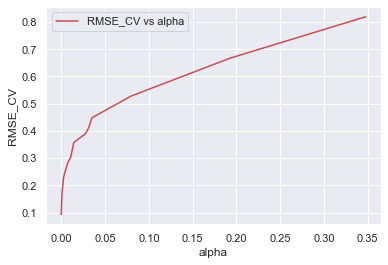

In [342]:
sns.lineplot(x='alpha', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs alpha")
plt.show()

Optimal Alpha for Decision Tree

In [343]:
optimal_alpha = output.iloc[np.argmin(output['RMSE_CV']),][0]
optimal_alpha

7.55344410139358e-07

In [344]:
optimal_DT = DecisionTreeRegressor(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

RMSE for optimized Decision Tree

In [345]:
MSE_test = round(np.mean(np.square(y_test - y_hat_opt)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.1

R-Squared for optimized Decision Tree

In [346]:
optimal_DT.score(X_test, y_test)

0.9935103763920607

In [347]:
dtree= DecisionTreeRegressor(ccp_alpha=optimal_alpha)
dtree.fit(X_train, y_train)
price_hat = dtree.predict(X_test)

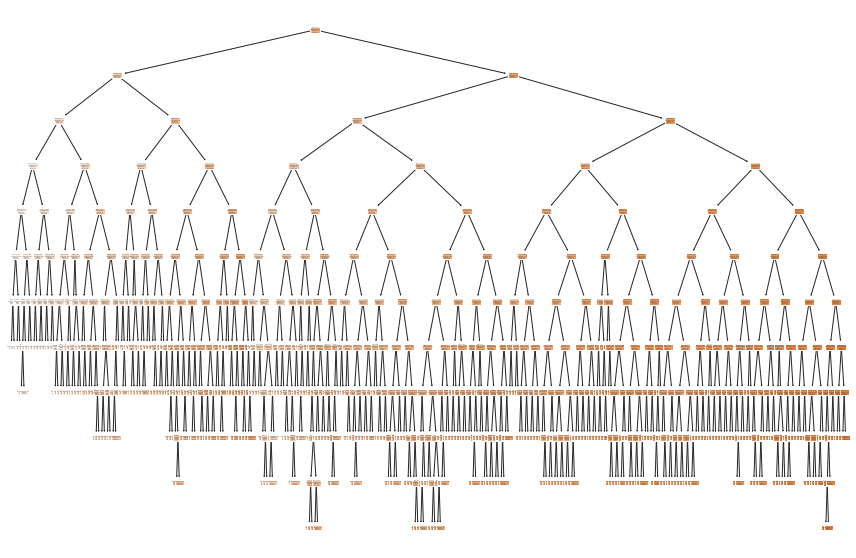

In [349]:
from sklearn import tree

fig = plt.figure(figsize=(15,10))
DT_plot = tree.plot_tree(dtree, feature_names=X_train.columns, filled=True)

This tree is quite bushy and difficult to interpret, but we thought we would include it just to show it off.

The decision tree performed quite a bit better than the linear regression benchmark. It took a long time to optimze though, which isn't ideal.

### Random Forest

In [350]:
from sklearn.ensemble import RandomForestRegressor

RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [351]:
y_hat = RF_regression.predict(X_test)

R-Squared for non optimized Random Forest

In [352]:
np.round(RF_regression.score(X_test, y_test),4)

0.9986

RMSE for non optimized Random Forest

In [353]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.0

In [354]:
my_param_grid = {'n_estimators': [10,100,500], 'max_features':['sqrt','log2'], 'max_depth':[5,10,20]}

grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=500; total time=   0.4s
[CV] END ...max_depth=5, max_features=sqrt, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

This had twice as many runs compared to the other optimizations, but it finished in 2 and a half minutes!

Best estimator Hyperparameters for Random Forest

In [355]:
grid.best_estimator_

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [356]:
y_hat_optimized = grid.predict(X_test)

R-squared with Optimized Random Forest

In [357]:
np.round(grid.score(X_test, y_test),4)

0.9495

RMSE for optimized Random Forest

In [358]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.22

Feature Importance

In [359]:
features = list(X_train.columns)

RF_Regressor = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, random_state=1000)
RF_Regressor.fit(X_train, y_train)

importance = RF_Regressor.feature_importances_

FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
2,Customer type,0.005918
3,Gender,0.006933
0,Branch,0.007621
1,City,0.007671
9,Payment,0.010484
4,Product line,0.017493
7,Date,0.037412
10,Rating,0.037631
8,Time,0.041385
5,Unit price,0.360122


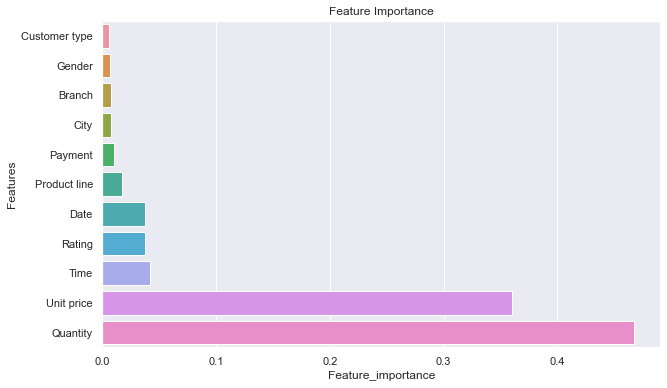

In [360]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

The most important variables are airbags, prod. year, and mileage. Most of these make sense and they are all somewhat related to each other. Newer vehicles have lower mileage, which as we sell usually means a higher sell price, they also more airbags, which are a strongly desired feature for cars.

### Boosting

In [365]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [366]:
AdB_regressor = AdaBoostRegressor(random_state=rand_state)
AdB_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1000)

In [367]:
GBM_regressor = GradientBoostingRegressor(random_state=rand_state, learning_rate=0.1, max_depth=6)
GBM_regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, random_state=1000)

In [368]:
XGB_regressor = XGBRegressor(random_state=rand_state, eta=0.1, max_depth=6)
XGB_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [369]:
y_hat_AdB      = AdB_regressor.predict(X_test)
y_hat_GBM      = GBM_regressor.predict(X_test)
y_hat_XGB      = XGB_regressor.predict(X_test)

In [370]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [371]:
np.round(AdB_regressor.score(X_test, y_test),4)

0.9535

In [372]:
np.round(GBM_regressor.score(X_test, y_test),4)

0.9983

In [373]:
np.round(XGB_regressor.score(X_test, y_test),4)

0.9989

As can be seen, the boosting methods do far better than the linear regression model, but worse than the random forest model.